# Real Estate Regression Task

### 1. Problem Framing
- Task, T: Predict the price (per unit) of a residential property
- Experience, E: A dataset, originally investigated by Yeh et al (2018), of 414 records of sales.
- Performance, P: Measure performance as RMSE in comparison to true selling price. Aim to have the RMSE as low as possible (must be below 7).


Reference: Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271

In [45]:
# External imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Explore and clean data

#### 2.1 Initial data exploration

In [46]:
# Load data
real_estate_df = pd.read_csv("../data/real_estate.csv")
# See the columns
real_estate_df.columns

Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit'],
      dtype='object')

In [47]:
# Get key information on the columns
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [48]:
# Get a numerical summary of the columns
real_estate_df.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


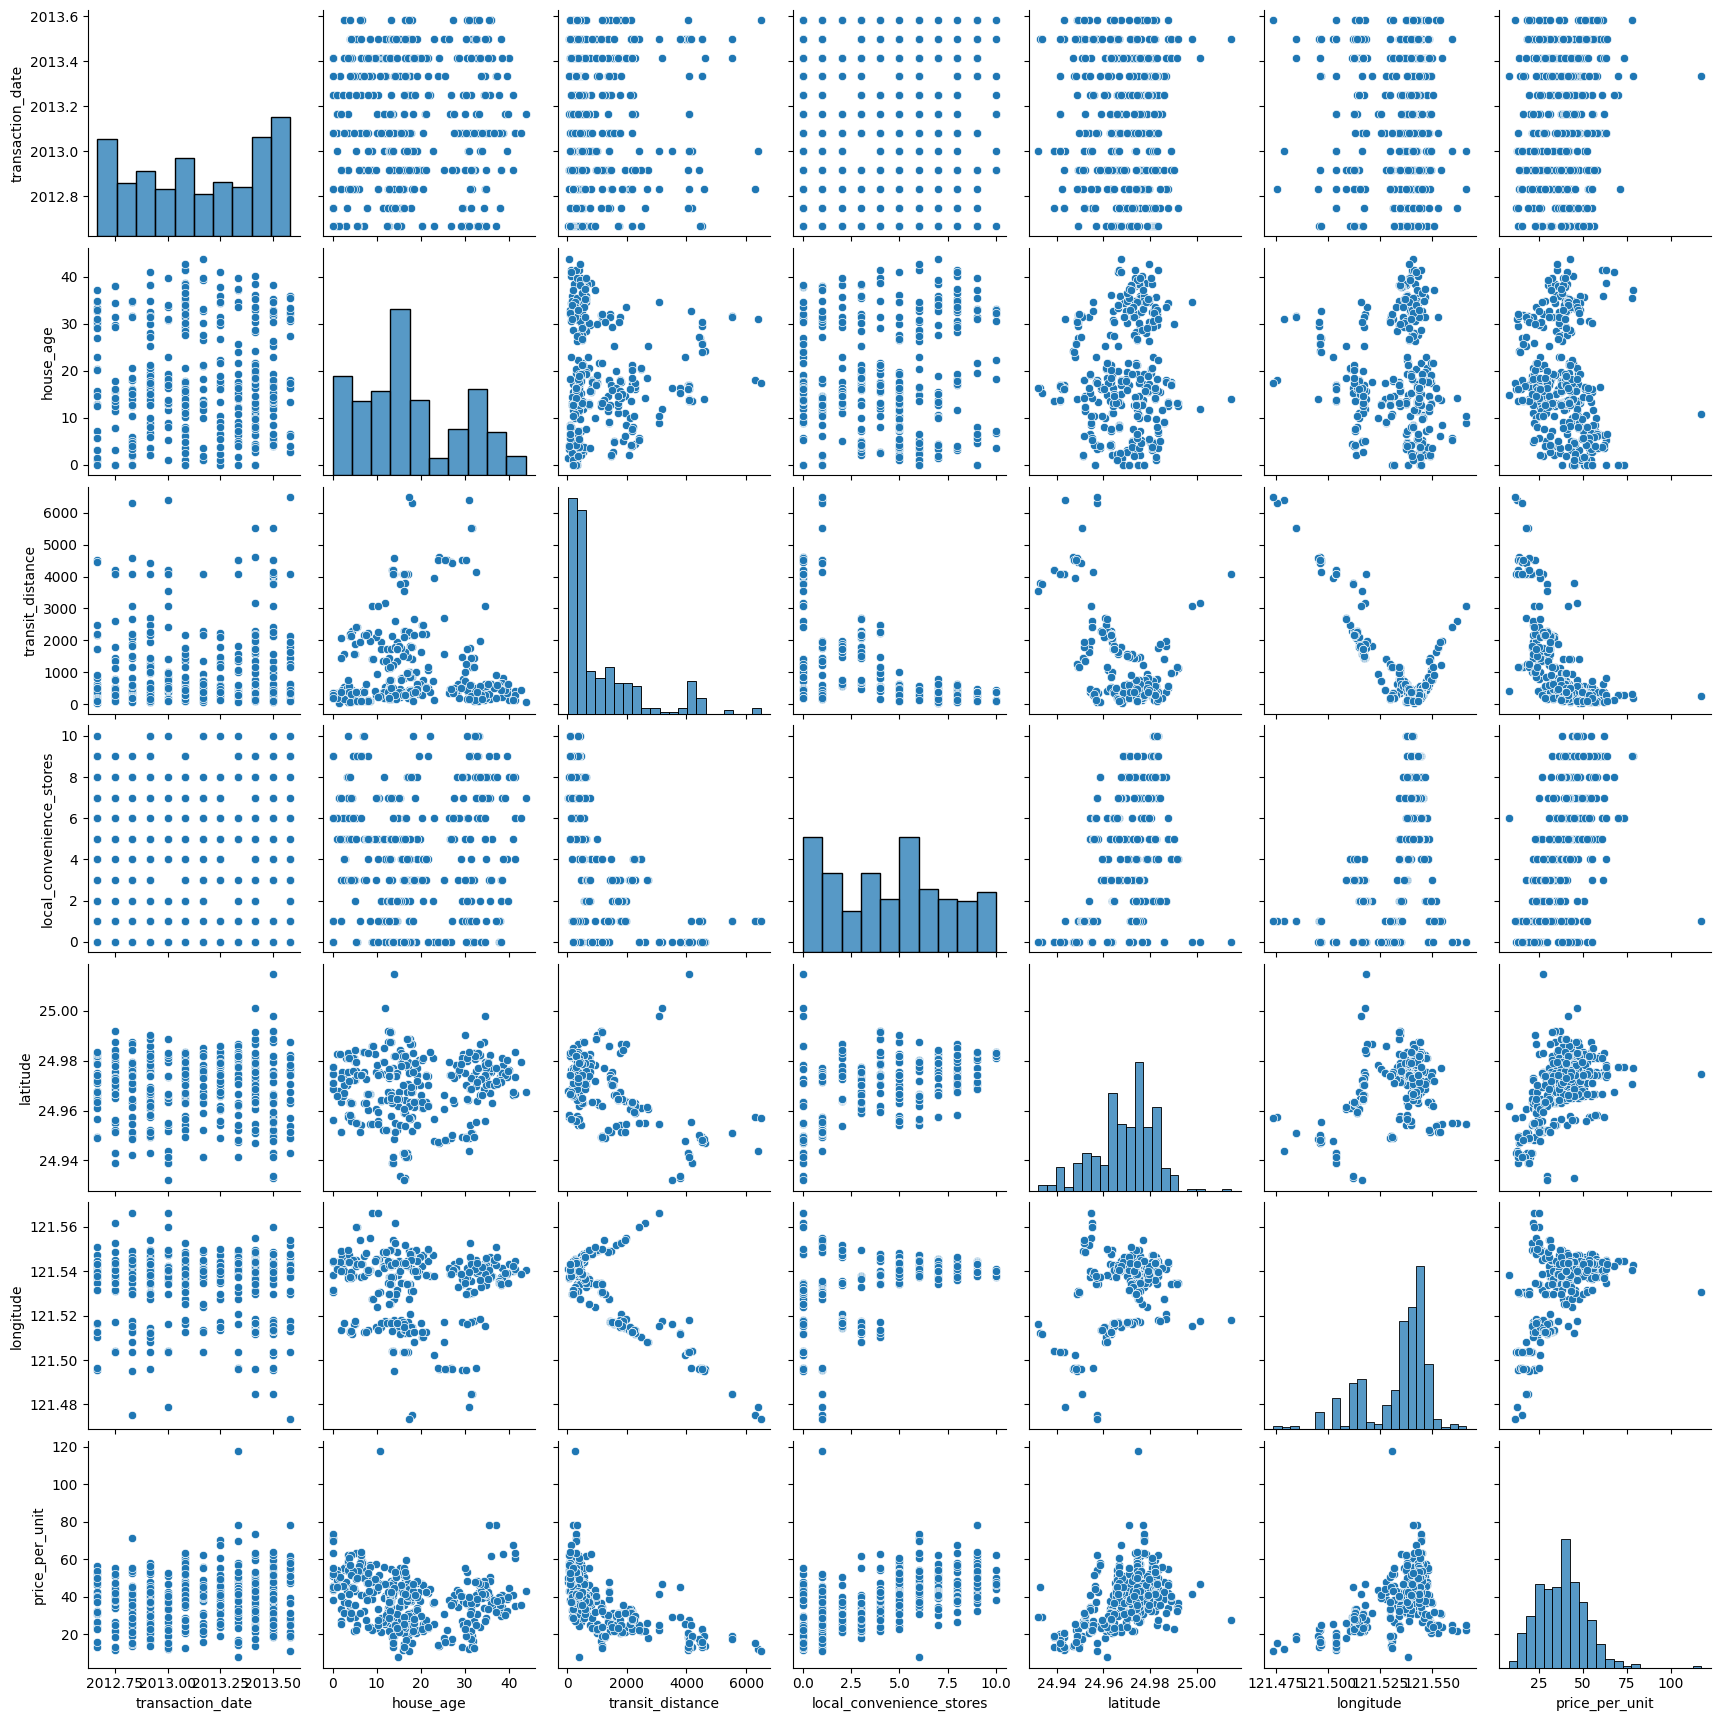

In [49]:
# Visually compare the columns
sns.pairplot(real_estate_df)

#### 2.2 Y-variable: price_per_unit

[Text(0.5, 1.0, 'Exploring the distribution of price_per_unit')]

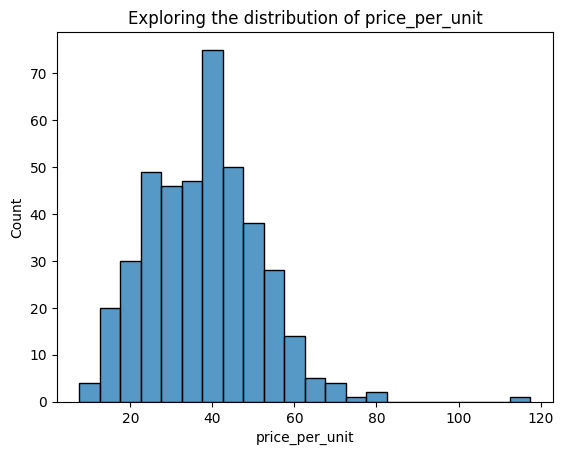

In [50]:
sns.histplot(real_estate_df.price_per_unit).set(
    title="Exploring the distribution of price_per_unit")

In the above histogram, we see price per unit is roughly normally distributed. This means if other variables are also distributed as such, we can use Pearson's correlation to compare them.

However, there does appear to be a few outliers at the 120 price mark. Let's investigate further.

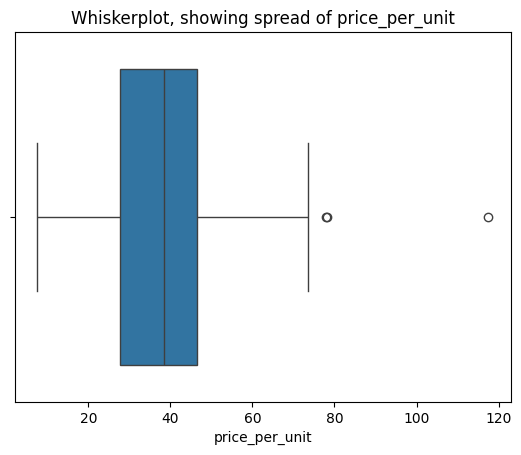

In [51]:
sns.boxplot(real_estate_df.price_per_unit, orient="h").set(
    title="Whiskerplot, showing spread of price_per_unit")
plt.show()

From this, let's regard anything 3 sd away from the mean as an outlier.

In [52]:
# Calculate mean and standard deviation (sd)
price_mean = real_estate_df.price_per_unit.mean()
price_sd = np.sqrt(real_estate_df.price_per_unit.var())

# Print mean and standard deviation
print(f"{price_mean = }, {price_sd = }")

# Print any datapoints greater than 3 sd away from the mean
print(real_estate_df[real_estate_df.price_per_unit > price_mean + 3*price_sd])
print(real_estate_df[real_estate_df.price_per_unit < price_mean - 3*price_sd])

# Remove outliers
real_estate_df = real_estate_df[real_estate_df.price_per_unit.between(
    price_mean - 3*price_sd, price_mean + 3*price_sd)]

price_mean = 37.980193236714975, price_sd = 13.606487697735314
     transaction_date  house_age  transit_distance  local_convenience_stores  \
270          2013.333       10.8          252.5822                         1   

     latitude  longitude  price_per_unit  
270   24.9746  121.53046           117.5  
Empty DataFrame
Columns: [transaction_date, house_age, transit_distance, local_convenience_stores, latitude, longitude, price_per_unit]
Index: []


### 3. Feature selection

### 4. Model choice and hyperparameter tuning

### 5. Evaluation